# Customer Churn Prediction: Imbalanced Datasets and Classification Algorithms

I was recently listening to a cool podcast episode on [Data Skeptic](https://itunes.apple.com/us/podcast/data-skeptic/id890348705?mt=2) in which Cheng-Tao Chu who shared some really interesting insights about practical machine learning in the industry. While this post is not about his interview, Cheng kept emphasizing on the point  *.. it’s reasonable to try as many algorithms as possible and to pick the best one since the cost of experimentation is low.* Basically, he meant you cannot solve a given business problem well if you just use your favourite algorithm! It is important to try out a bunch of algorithms for the given prediction task at hand. 

In the same spirit, since there is no rule of thumb and the best algorithm is specific for for each problem, I wish to introduce (and learn) a method to evaluate a suite of classification algorithms for a particular problem at hand. 

In this notebook we'll go through a few important topics.

* **Preprocessing Data:** How do you handle categorical features?
* **Class Imbalance:** What do you do when the distribution of target labels is skewed?
* **Precision & Recall Analysis:** Is accuracy a good metric to optimize? What type of errors do you want to minimize?
* **Spot checking a multiple algorithms:** Which algorithm/model is the most suitable for the task at hand? 

---

## The problem of customer churn.

Inspired by a Kaggle Challenge hosted by Deloitte, my aim through this project was to solve a real world business problem. So let's begin!

**Customer Churn:** Losing/attrition of customers from the company. Especially, the industries that the user acquisition is costly, it is crucially important for one company to reduce and ideally make the customer churn to 0 to sustain their recurring revenue. If you consider customer retention is always cheaper than customer acquisition and generally depends on the data of the user(usage of the service or product), it poses a great/exciting/hard problem for machine learning.


*"Customer churn prevention allows companies to react preemptively to the customer and then try to provide a better experience to her. This has two advantages to the company; product gets better with the feedback that company received from the customer and as customer continues to use the product, company would not lose the customer."*

---

## Binary Classification 

1. Preprocessing of the data - inter/intra class variation
2. Class Imbalance - therefore test various classifiers
3. Test and optimize certain metrics.

### Link to the dataset is [here](https://github.com/ericchiang/churn/blob/master/data/churn.csv)


In [23]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sframe as sf
import sklearn
from sklearn import metrics
from sklearn import preprocessing

plt.style.use('fivethirtyeight') # Good Looking plots
pd.set_option('display.max_columns', None) # Display any number of columns

_DATA_DIR = 'churn-master/data'
_CHURN_DATA_PATH = os.path.join(_DATA_DIR, 'churn.csv')

import seaborn as sns

In [2]:
data = sf.SFrame.read_csv(_CHURN_DATA_PATH)
data['Churn'] = data['Churn?'] == 'True.'
data['Churn'].astype(int)

Finished parsing file /Users/siddharth481/Documents/IITBombay/Machine_Learning/Coursera - Univeristy of Washington - ML/Practice/churn-master/data/churn.csv

Parsing completed. Parsed 3333 lines in 0.022014 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,int,int,str,str,str,int,float,int,float,float,int,float,float,int,float,float,int,float,int,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


dtype: int
Rows: 3333
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, ... ]

## Preprocessing

1. **Label Encoding**  - encode String attributes into Numeric attributes
2. Convert True/False to integer attributes 1/0
3. Drop/Remove unnecessary columns (Domain Knowledge)
4. Extract Classification labels into y.


In [3]:
# Discreet value integer encoder
label_encoder = preprocessing.LabelEncoder()
y = data['Churn'].to_numpy()
data['State'] = label_encoder.fit_transform(data['State'])
data.remove_columns(['Area Code','Phone','Churn?', 'Churn'])


State,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls
16,128,no,yes,25,265.1,110,45.07,197.4,99
35,107,no,yes,26,161.6,123,27.47,195.5,103
31,137,no,no,0,243.4,114,41.38,121.2,110
35,84,yes,no,0,299.4,71,50.9,61.9,88
36,75,yes,no,0,166.7,113,28.34,148.3,122
1,118,yes,no,0,223.4,98,37.98,220.6,101
19,121,no,yes,24,218.2,88,37.09,348.5,108
24,147,yes,no,0,157.0,79,26.69,103.1,94
18,117,no,no,0,184.5,97,31.37,351.6,80
49,141,yes,yes,37,258.6,84,43.96,222.0,111


In [4]:
data["VMail Plan"] = data["VMail Plan"] == 'yes'
data["Int'l Plan"] = data["Int'l Plan"] == 'yes'
data.head()

State,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls
16,128,0,1,25,265.1,110,45.07,197.4,99
35,107,0,1,26,161.6,123,27.47,195.5,103
31,137,0,0,0,243.4,114,41.38,121.2,110
35,84,1,0,0,299.4,71,50.9,61.9,88
36,75,1,0,0,166.7,113,28.34,148.3,122
1,118,1,0,0,223.4,98,37.98,220.6,101
19,121,0,1,24,218.2,88,37.09,348.5,108
24,147,1,0,0,157.0,79,26.69,103.1,94
18,117,0,0,0,184.5,97,31.37,351.6,80
49,141,1,1,37,258.6,84,43.96,222.0,111


## Model Building and Checking

After preprocessing, dataframe is ready to be represented as matrix that is amenable to Scikit Learn. I already separated the labels, so I would just convert the dataframe into a numpy matrix.

In [7]:
X = data.to_dataframe().values
print X.shape
X

(3333, 18)


array([[  16.  ,  128.  ,    0.  , ...,    3.  ,    2.7 ,    1.  ],
       [  35.  ,  107.  ,    0.  , ...,    3.  ,    3.7 ,    1.  ],
       [  31.  ,  137.  ,    0.  , ...,    5.  ,    3.29,    0.  ],
       ..., 
       [  39.  ,   28.  ,    0.  , ...,    6.  ,    3.81,    2.  ],
       [   6.  ,  184.  ,    1.  , ...,   10.  ,    1.35,    2.  ],
       [  42.  ,   74.  ,    0.  , ...,    4.  ,    3.7 ,    0.  ]])

## Standardization or Feature Scaling - Discrete Features, Continuous Features. 

Since the features have quite different value ranges and some of them are discrete and some of them take continuous values, I need to scale them first. Removing mean and dividing the standard deviation of features respectively. Generally, this is one of the most commonly used preprocessing step.

In [8]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

## Model Building and Class Imbalance

### Baseline for comparison: 

Like always, let's choose randomly guessing the majority as the baseline.



In [9]:
print('Majority-Class Classifier: {:.2f}'.format(metrics.accuracy_score(y, [0 for ii in y.tolist()])))

Majority-Class Classifier: 0.86


**CAUTION: Random guessing gives an accuracy of over 0.86! This is due to class imbalance**, guessing majority class (no churn or 0) for all examples gives a fairly good accuracy. Since one class is 6 times of other class. I could get fairly accurate prediction if I predict the common class. 

I will now visualize the distribution of different classes in my dataset.

Percentage of majority class:  0.855085508551


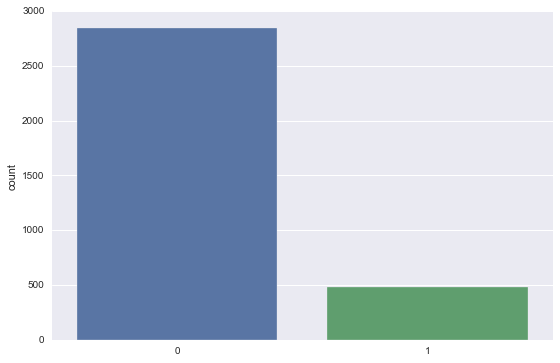

In [15]:
import seaborn as sns
from __future__ import division
sns.countplot(x=y)

print 'Percentage of majority class: ', (y.shape[0] - np.sum(y))/y.shape[0]

Woah! No wonder why randomly guessing 'no churn' was giving us such a high accuracy! This is called **'class imbalance'** and if not handled correctly, this introduces an unwanted bias in our models. This is a very practical problem in classification tasks and there exist a a bunch of ways to handle imbalanced datasets. I will solve this by sampling methods.

## Cross Validation

### Stratified KFold CV:
I am using **Stratified K Fold** because due to the **class imbalanced**. I do not want any folds to have only 1 particular class or even 1 class dominating the other one as it may create a bias in that particular fold. **Stratification makes sure that the percentage of samples for each class is similar across folds(if not same).** 

More about stratified KFold [here in the sklearn documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedKFold.html)


In [25]:
from sklearn import cross_validation

def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = cross_validation.StratifiedKFold(y, n_folds=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    for ii, jj in stratified_k_fold:
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        model = clf_class(**kwargs)
        model.fit(X_train,y_train)
        y_pred[jj] = model.predict(X_test)
    return y_pred

## Checking various Classification Models

In practice, I like testing Linear, Non-Linear and Ensemble classifiers on my dataset after preprocessing. This gives me an idea of which type assumption (made by the algorithm) works well with the underlying distribution of my data.


1. Gradient Boosting Classifier (Ensemble)
2. SVM (Non-linear)
3. Random Forest Classifier (Ensemble or Boosting)
4. K-NN Classifier (Non-linear)
5. Logistic Regression (Linear)

In [26]:
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model

print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, svm.SVC))))
print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier: {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))
print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, linear_model.LogisticRegression))))

Gradient Boosting Classifier:  0.95
Support vector machine(SVM):   0.92
Random Forest Classifier:      0.94
K Nearest Neighbor Classifier: 0.90
Logistic Regression:           0.86


**Based on accuracy, Gradient Boosting classifer is the winner with an accuracy of 0.95!** At the same time Random Forests finished second, very close with a score of 0.94. Again, which one is better?

To answer that, we need to dig deeper look into the confusion matrices, precision and recall score. Confusion matrices give a good summary of the kind of erros our models make. 


## Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

def generate_classification_report(y, model):
    return classification_report(y, model)

print 'Gradient Bossting Classifier :\n',classification_report(y,stratified_cv(X, y, ensemble.GradientBoostingClassifier)) 
print '\n', confusion_matrix(y,stratified_cv(X, y, ensemble.GradientBoostingClassifier))

print '\nLogistic Regression :\n', classification_report(y,stratified_cv(X, y, linear_model.LogisticRegression))
print '\n', confusion_matrix(y,stratified_cv(X, y, linear_model.LogisticRegression))

print '\nRandom Forest :\n', classification_report(y,stratified_cv(X, y,  ensemble.RandomForestClassifier))
print 'n', confusion_matrix(y,stratified_cv(X, y,  ensemble.RandomForestClassifier))

print '\nKNeighbors Classifier :\n', classification_report(y,stratified_cv(X, y, neighbors.KNeighborsClassifier))
print '\n', confusion_matrix(y,stratified_cv(X, y, svm.SVC))

print '\n Support Vector Classification:\n', classification_report(y,stratified_cv(X, y, svm.SVC))
print '\n', confusion_matrix(y,stratified_cv(X, y, svm.SVC))


Gradient Bossting Classifier :
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      2850
          1       0.91      0.73      0.82       483

avg / total       0.95      0.95      0.95      3333


[[2818   32]
 [ 126  357]]

Logistic Regression :
             precision    recall  f1-score   support

          0       0.88      0.97      0.92      2850
          1       0.55      0.20      0.30       483

avg / total       0.83      0.86      0.83      3333


[[2766   84]
 [ 383  100]]

Random Forest :
             precision    recall  f1-score   support

          0       0.94      0.99      0.97      2850
          1       0.91      0.65      0.76       483

avg / total       0.94      0.94      0.94      3333

n [[2828   22]
 [ 165  318]]

KNeighbors Classifier :
             precision    recall  f1-score   support

          0       0.90      0.99      0.94      2850
          1       0.82      0.38      0.52       483

avg / total  

## Conclusion:

To decide the winner, we need to ask ourselves the question, *"That kind of error is more costly for our business problem? False positive or false negative?"*. 

False positives in this context, will mean we predict a customer churns but in reality he doesn't. This leads to wasting of the resource.

False negative in this same context, will mean we predict that the customer stays (no churn) but the customer leaves! We spoke earlier about how the cost of acquiring the new customer is often more than the cost of retaining the old customer. 

The Random Forest Classifier (accuracy of 0.94) makes 22 false negative errors while the Gradient Boosting Classifier (accuracy of 0.95) makes 32 false negative errors. Going by the crude logic developed above, **Random Forest Classifier is the winner!** However, in reality it would be interesting to come up with a cost of making Type-i and Type-ii errors and then calculating  the net cost of errors for evaluating the most suitable classifier.

There you go, a neat way of evaluating different models to solve a business problem. Would love to hear your feedback!

FIN.
